# Time Series Forecasting

**scope**: 
- Data Wrangling for time-series in Python
- self projecting(o), cause and effect(X)
- uni-variate(o), multi-variate(x)
- Time-series Basics; seasonality, trend, residual
- Time-series forecasting using ARIMA (Box Jenkins Approach, ACF, PACF)

**requirements**:
- python 2.7 or 3
- statsmodel 0.7.0
- 

**reference**:   
[1] [Seasonal ARIMA with Python](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/)  
[2] [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)  
[3] [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)  
[4] [데이터 사이언스 스쿨/ 시계열 분석](https://www.datascienceschool.net/view-notebook/e0c935b3f55c4302b0fb0c93986562cd/)  
[5] [시계열 데이터의 통계적 분석 방법](https://www.google.co.kr/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjJkr3qqvDQAhVIyLwKHUgSDKoQFgggMAA&url=https%3A%2F%2Fbigdata.kookmin.ac.kr%2F%3Fmodule%3Dfile%26act%3DprocFileDownload%26file_srl%3D351%26sid%3D43ea21693d9f550e5e39869d5ce52adc&usg=AFQjCNFeXfnfSgzHQHDP85VZTBUvi4wy0Q&sig2=uZvEKrxxd_rr4Gv4lOB7Yw)




## 1. 시계열 데이터 이해

시계열 데이터 분석을 위해서는 기본적으로 시계열 데이터의 요소 및 정상/비정상 과정에 대한 이해가 필요하다.


### 1.1. 시계열 데이터 요소 

- **추세(Trend)**: 장기적으로 나타나는 변동 패턴
- **계절성(Seasonal)**: 주,월,분기,반기 단위 등 이미 알려진 시간의 주기로 나타나는 패턴 
- **주기(Cyclic)**: 최소 2 년 단위로 나타나는 고정된 기간이 아닌 장기적인 변동
- **랜덤요소 (random/residual/remainder)**

![](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-decompose.png)


### 1.2. 정상 및 비정상 과정 모형 Staionary & Non-Stationary 


일반적으로 시계열 분석의 용이성을 위해 아래와 같이 비정상과정 모형(𝑌 )에 따르는 시계열 데이터 "
또한 추정 가능한 결정론적 추세함수 ($𝑓_{t}$ , trend) 와 확률 정상과정($ 𝑋_{t} $)의 합으로 가정하고 분석한다.

$$\begin{align*} & y_{t}\sim f_{\left( t\right) }+X_{t}\end{align*} $$

따라서 시계열 데이터 분석에서 정상과정 모형의 특성 및 분석방법들을 이해하는 것이 우선적으로 요구된다. 다음은 정상 시계열 모형과 비정상 시계열 모형의 특징 비교이다.

[참고](https://www.datascienceschool.net/view-notebook/0ddd47967585403ab8b4cb60d0e420f6/)

**A.시간 추이에 따른 평균값의 불변여부**  
The mean of the series should not be a function of time. The red graph below is not stationary because the mean increases over time.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

**B.시간추이에 따른 분산의 불변여부**  
The variance of the series should not be a function of time. This property is known as homoscedasticity. Notice in the red graph the varying spread of data over time.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

**C.시점간의 공분산**  
The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)


본 장에서 소개하는 통계적 시계열 추정 모형들은 시계열 데이터를 정상화시킨 모형 위에서 설계되어 있으므로, 필수적으로 데이터를 정상화 시키는 과정이 필요하다.   

## 2. 시계열 데이터 분석 Framework

일반적으로 아래와 같은 방법으로 시계열 데이터 분석을 진행한다.  
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/flowchart.png)

### 2.1 EDA; 시계열 데이터 확인하기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

* __Wrangling__: 
dropna, column name, DF slicing, date_range, type conversion

In [2]:
df = pd.read_csv('data/portland-oregon-average-monthly.csv', index_col='Month')
# df.index.name=None
# df.reset_index(inplace=True)
df.dropna(axis=0, inplace=True)
df.columns = ['ridership']
print (df.head(),'\n ... \n', df.tail() )

df = df.ix[:-1]
print (df.tail())

        ridership
Month            
1960-01       648
1960-02       646
1960-03       639
1960-04       654
1960-05       630 
 ... 
                                                    ridership
Month                                                       
1969-03                                                 1419
1969-04                                                 1432
1969-05                                                 1394
1969-06                                                 1327
Portland Oregon average monthly bus ridership (...     n=114
        ridership
Month            
1969-02      1425
1969-03      1419
1969-04      1432
1969-05      1394
1969-06      1327


In [3]:
#ERROR --> index type should be 'datetime'
# df.plot() 

# ERROR --> datetime requires 'YY-MM-DD-...'  format
# df['ridership'] = pd.to_datetime(df['ridership']) 

* change df.index as datetime object:

In [4]:
# for datetime conversion
pd.date_range("1960-01","1969-06",freq="MS")

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-09-01', '1968-10-01', '1968-11-01', '1968-12-01',
               '1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01'],
              dtype='datetime64[ns]', length=114, freq='MS')

In [5]:
df.index = pd.date_range("1960-01","1969-06",freq="MS")
print(df.head(),'\n ... \n',df.tail())

           ridership
1960-01-01       648
1960-02-01       646
1960-03-01       639
1960-04-01       654
1960-05-01       630 
 ... 
            ridership
1969-02-01      1425
1969-03-01      1419
1969-04-01      1432
1969-05-01      1394
1969-06-01      1327


In [6]:
type(df.index)

pandas.tseries.index.DatetimeIndex

* change type of dataframe's column

In [10]:
df['ridership'] = df['ridership'].astype(int)
print (df.dtypes)
# OR, alternatively, 
# df['ridership'] = df['ridership'].apply(lambda x: int(x))
# df.dtypes

ridership    int64
dtype: object


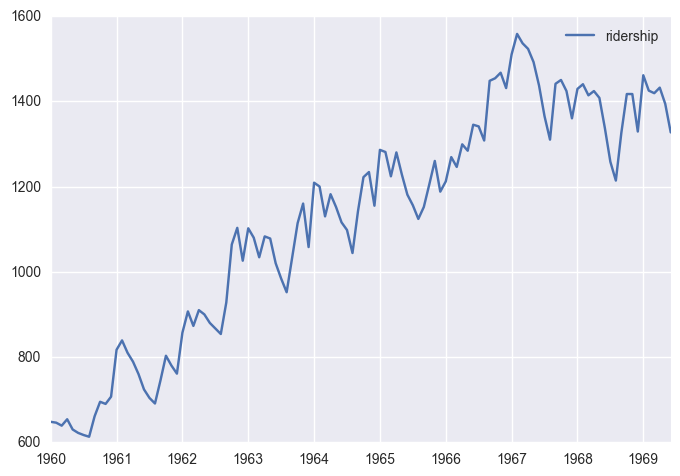

In [22]:
df.plot()
# df.plot(figsize=(12,8), title = 'Montly Ridership', fontsize=14)

#### Seasonal Decomposition (STL)

남은 residual value를 추출함으로써, time-independent한 time-series를 뽑음

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


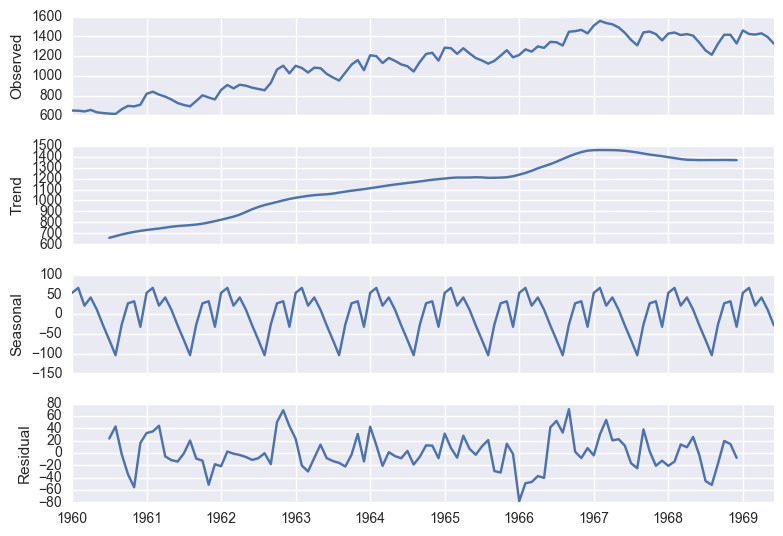

In [21]:
decomposition = seasonal_decompose(df['ridership'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

### 2.2 시계열 데이터 정상화 하기

### 정상성 확인 stationarity check
일반적으로 데이터가 stationary한 경우는 거의 없음. 
정상성을 Test하기 위해서 두가지 방법 사용  
**(1) 눈으로 직관적 확인 ~ STL, Rolling statistics(moving average)   
(2) Dickey-FUller test [링크](https://www.datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/)  **

아래는  Dickey-Fuller test 와 더불어  trend를 추출하는 방법중 하나인 rolling statistics를 이용해서 동시에 정상성을 검사하는 방법이다

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


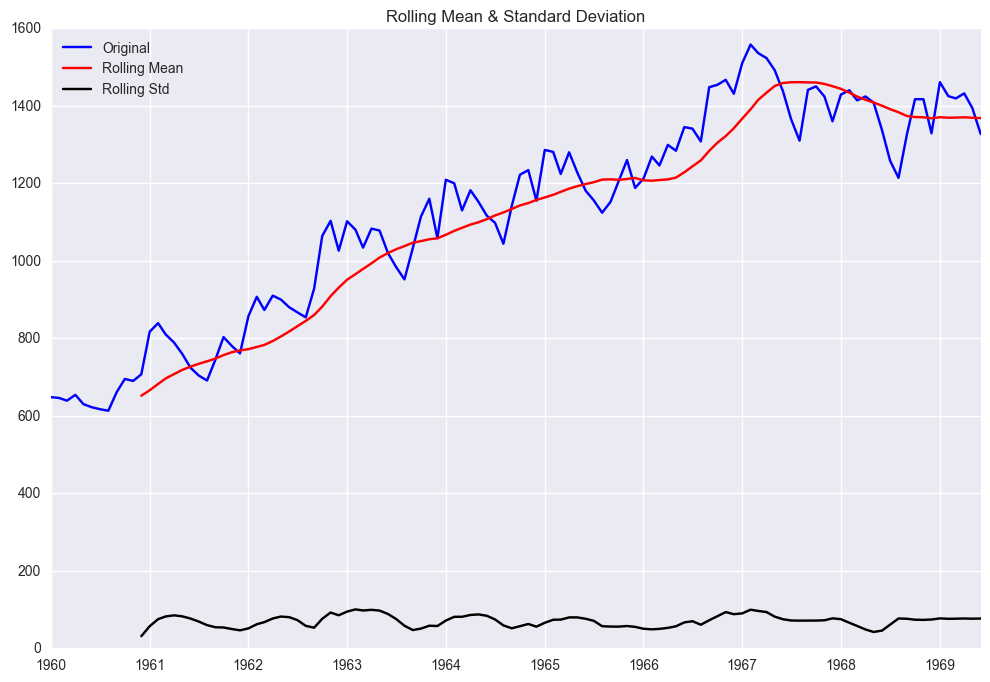

<Results of Dickey-Fuller Test>
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


In [30]:
test_stationarity(df['ridership'])

* Judgment:   
(null-hypothesis: TS is non-stationary)  
p-value < 0.05: reject null-hypothesis --> Stationary  
p-value > 0.05: accept --> non-Stationary  

### 정상화 Stationarize




### 2.3 모수추정; ACF/PACF를 이용한 최적 파라미터 도출

### 2.4 ARIMA 모형 

### 2.5 예측

LSTM을 이용한 시계열 추정